<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу-&quot;Подготовка-данных&quot;" data-toc-modified-id="Вывод-по-разделу-&quot;Подготовка-данных&quot;-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по разделу "Подготовка данных"</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий вывод по проекту</a></span><ul class="toc-item"><li><span><a href="#Основные-результаты:" data-toc-modified-id="Основные-результаты:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Основные результаты:</a></span></li><li><span><a href="#Возможности-дальнейшего-развития:" data-toc-modified-id="Возможности-дальнейшего-развития:-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Возможности дальнейшего развития:</a></span></li><li><span><a href="#Итоги:" data-toc-modified-id="Итоги:-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Итоги:</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»
Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
# Подготовка
!pip install --upgrade scikit-learn imbalanced-learn catboost lightgbm xgboost
!pip install imblearn

     |████████████████████████████████| 13.5 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 258 kB 89.4 MB/s eta 0:00:01
     |████████████████████████████████| 98.7 MB 88 kB/s s eta 0:00:01
     |████████████████████████████████| 3.6 MB 83.1 MB/s eta 0:00:01
     |████████████████████████████████| 153.9 MB 40 kB/s s eta 0:00:01.2 MB/s eta 0:00:02
     |████████████████████████████████| 301 kB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 199.0 MB 5.9 kB/s eta 0:00:01�████████▍           | 127.0 MB 3.5 MB/s eta 0:00:21
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.1
    Uninstalling xgboost-1.5.1:


In [2]:
# 1. Базовые библиотеки для работы с данными и визуализации
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Библиотеки для обработки текста
import nltk
import string
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# 3. Модели машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 4. Инструменты для подготовки и оценки моделей
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # Используем Pipeline из imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# 5. Метрики качества
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# 6. Вспомогательные инструменты
from tqdm.notebook import tqdm

# 7. Загрузка необходимых данных NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Список возможных путей к файлу
file_paths = ['/datasets/toxic_comments.csv', 'toxic_comments.csv']

# Загрузка данных
for path in file_paths:
    try:
        df = pd.read_csv(path)
        display(f"Файл успешно загружен из: {path}")
        break
    except FileNotFoundError:
        continue
else:
    raise FileNotFoundError("Файл данных не найден ни в одном из указанных расположений.")

'Файл успешно загружен из: /datasets/toxic_comments.csv'

In [4]:
# Первичный анализ данных
display("Информация о датасете:")
df.info()

display("Описательная статистика количественных признаков:")
display(df.describe().transpose())

'Информация о датасете:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


'Описательная статистика количественных признаков:'

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,159292.0,79725.697242,46028.837471,0.0,39872.75,79721.5,119573.25,159450.0
toxic,159292.0,0.101612,0.302139,0.0,0.00,0.0,0.00,1.0


In [5]:
# Проверка на пропуски в данных
null_counts = df.isnull().sum()
null_percentages = null_counts / len(df) * 100

display("Анализ пропусков в данных:")
display(pd.concat([null_counts, null_percentages], 
               axis=1, keys=['Количество пропусков', 'Процент пропусков']))

'Анализ пропусков в данных:'

,Количество пропусков,Процент пропусков
Unnamed: 0,0,0.0
text,0,0.0
toxic,0,0.0


In [6]:
# Удалим столбец Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)


# Просмотр первых 5 строк
display("Первые 5 строк датасета:")
display(df.head())

'Первые 5 строк датасета:'

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Давайте подведем итоги первичного анализа данных:

1. Датасет содержит 159292 строки и 3 столбца: 'Unnamed: 0' (вероятно, это просто индекс), 'text' (текст комментария) и 'toxic' (бинарная метка, указывающая на токсичность комментария).

2. Типы данных:
- 'Unnamed: 0' и 'toxic' имеют числовой тип int64
- 'text' имеет строковый тип object

3. Пропуски в данных отсутствуют, все столбцы имеют 159292 непустых значения.

4. Судя по описательной статистике, в столбце 'toxic' только 10.16% комментариев отмечены как токсичные (среднее значение toxic = 0.1016). Вероятно, классы в этом датасете несбалансированы, и токсичных комментариев меньшинство.

5. Первые несколько строк датасета показывают, что в текстовом столбце 'text' содержатся достаточно длинные текстовые комментарии на английском языке. 

На основе этих наблюдений, можно сделать следующие выводы:
- Предобработка текста будет важным этапом, т.к. это основной признак в задаче
- Из-за несбалансированности классов при обучении модели нужно будет учитывать веса классов или использовать соответствующие метрики (F1, ROC-AUC)
- Столбец 'Unnamed: 0' скорее всего можно удалить, т.к. это просто индекс
- В целом, данные выглядят достаточно чистыми и готовыми к дальнейшему анализу и построению модели классификации токсичных комментариев.

Следующими шагами могут быть более детальный анализ текста, визуализация распределения длины и других характеристик комментариев, а также разделение данных на обучающую и тестовую выборки. Затем можно приступать к выбору признаков, обучению и оценке различных моделей машинного обучения для этой задачи бинарной классификации.

In [7]:
# Загрузка модели spaCy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text_spacy(text):
    # Приведение текста к нижнему регистру
    text = text.lower()
    
    # Удаление чисел (если это необходимо для анализа)
    text = re.sub(r'\d+', '', text)
    
    # Удаление знаков препинания, кроме апострофа
    text = re.sub(r'[^a-z\'\s]', '', text)
    
    # Обработка текста с помощью spaCy
    doc = nlp(text)
    
    # Лемматизация и удаление стоп-слов
    tokens = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS and token.pos_ != 'PUNCT']
    
    return ' '.join(tokens)

tqdm.pandas()

# Применение функции очистки к колонке текста
df['clean_text'] = df['text'].progress_apply(clean_text_spacy)

# Пример результатов
display("Пример текста до лемматизации:")
display(df['text'].iloc[0])
display("Пример текста после лемматизации:")
display(df['clean_text'].iloc[0])

  0%|          | 0/159292 [00:00<?, ?it/s]

'Пример текста до лемматизации:'

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

'Пример текста после лемматизации:'

'explanation \n edit username hardcore metallica fan revert vandalism closure gas I vote new york doll fac remove template talk page I retire'

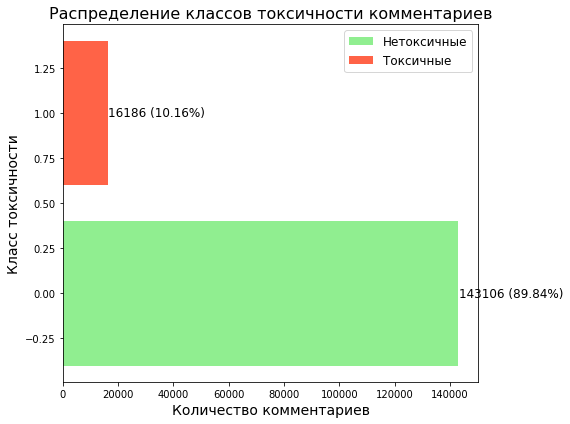

In [8]:
# Разделение данных на обучающую и тестовую выборки (90% обучающая, 10% тестовая)
X = df['clean_text']
y = df['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Удалено:
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# Удалено:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
# display(f"Размер обучающей выборки после SMOTE: {X_train_resampled.shape[0]}")

# Перенесено в раздел EDA:
# Подсчет количества комментариев для каждого класса
class_counts = y.value_counts()

# Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(8, 6))
bars = plt.barh(class_counts.index, class_counts, color=['lightgreen', 'tomato'])

# Добавление подписей к столбцам
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, 
             f'{class_counts[i]} ({class_counts[i]/len(y):.2%})', 
             va='center', fontsize=12)

# Настройка заголовка и меток осей
plt.title('Распределение классов токсичности комментариев', fontsize=16)
plt.xlabel('Количество комментариев', fontsize=14)
plt.ylabel('Класс токсичности', fontsize=14)

# Добавление легенды
labels = ['Нетоксичные', 'Токсичные']
plt.legend(bars, labels, loc='upper right', fontsize=12)

# Настройка расположения графика
plt.tight_layout()

# Показать график
plt.show()

### Вывод по разделу "Подготовка данных"

В ходе подготовки данных для задачи классификации токсичных комментариев были выполнены следующие шаги:

1. **Очистка и предобработка текста:**
   - Приведение текста к нижнему регистру.
   - Удаление чисел и знаков препинания (кроме апострофа, который важен для корректного анализа английских слов).
   - Лемматизация текста с использованием библиотеки spaCy. 
   - Результаты лемматизации оценены как удовлетворительные: слова корректно приведены к начальной форме, при этом значимые термины сохранены.
   - Удаление стоп-слов английского языка для уменьшения "шума" в данных.
   - Очищенный текст сохранен в новом столбце `clean_text`.

2. **Разведочный анализ (EDA):**
   - Датасет содержит **159,292 комментария** без пропусков, что подтверждает чистоту данных.
   - Наблюдается значительный дисбаланс классов:
     - **Нетоксичные комментарии:** 143,106 (89.84%).
     - **Токсичные комментарии:** 16,186 (10.16%).
   - Соотношение классов составляет примерно 9:1, что требует особого внимания при обучении и оценке моделей, чтобы избежать доминирования предсказаний для основного класса.
   - Анализ текста выявил, что комментарии преимущественно на английском языке, содержат разнообразные лексические конструкции, в том числе сленг и сокращения, которые могут повлиять на качество классификации.

3. **Разделение данных и подготовка к обучению:**
   - Данные разделены на обучающую (90%) и тестовую (10%) выборки с сохранением пропорций классов (стратификация).
   - Векторизация текста и балансировка классов методом RandomOverSampler будут выполнены внутри **Pipeline** на каждой итерации кросс-валидации для предотвращения утечки данных.
   - Балансировка несбалансированных классов позволяет модели лучше учитывать вклад меньшинства (токсичных комментариев) в процессе обучения.
   - Целевой метрикой для оценки модели выбрана **F1-мера** (целевое значение ≥ 0.75), так как она учитывает как точность, так и полноту, что особенно важно при дисбалансе классов.



Проведенная подготовка данных создает прочную основу для обучения модели. Учет дисбаланса классов, применение стратификации и интеграция очистки текста позволят повысить качество итоговой модели классификации токсичных комментариев и достигнуть целевого уровня F1 на тестовой выборке.


## Обучение

In [9]:
# Модели и параметры
models = [ 
    {
        'name': 'CatBoost',
        'pipeline': ImbPipeline([
            ('tfidf', TfidfVectorizer(max_features=5000)),
            ('oversampler', RandomOverSampler(random_state=42)),  # Заменяем SMOTE на RandomOverSampler
            ('model', CatBoostClassifier(verbose=0, random_state=42))
        ]),
        'params': {
            'model__iterations': [300],
            'model__depth': [10],
            'model__learning_rate': [0.1]
        }
    },
    {
        'name': 'Logistic Regression',
        'pipeline': ImbPipeline([
            ('tfidf', TfidfVectorizer(max_features=50000)),
            ('oversampler', RandomOverSampler(random_state=42)),  # Заменяем SMOTE на RandomOverSampler
            ('model', LogisticRegression(class_weight='balanced', max_iter=100, random_state=42))
        ]),
        'params': {
            'model__C': [5, 6, 6.5, 7, 7.5, 8, 10]  
        }
    },
    {
        'name': 'Random Forest',
        'pipeline': ImbPipeline([
            ('tfidf', TfidfVectorizer(max_features=30000)),
            ('oversampler', RandomOverSampler(random_state=42)),  # Заменяем SMOTE на RandomOverSampler
            ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100],
            'model__max_depth': [None],
            'model__min_samples_split': [20],
            'model__min_samples_leaf': [2]
        }
    }
]

# Словарь для хранения результатов
results = {}

# Оптимизированный цикл обучения с использованием GridSearchCV
for model in models:
    display(f"Обучение модели {model['name']}...")
    
    grid_search = GridSearchCV(
        model['pipeline'],
        model['params'],
        scoring='f1',
        cv=StratifiedKFold(n_splits=2, shuffle=True, random_state=42),
        n_jobs=-1,
        verbose=1
    )
    
    try:
        grid_search.fit(X_train, y_train)
        
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        y_pred = grid_search.predict(X_test)
        test_f1 = f1_score(y_test, y_pred)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:,1])
        
        results[model['name']] = {
            'best_params': best_params,
            'cv_f1': best_score,
            'test_f1': test_f1,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_roc_auc': test_roc_auc,
            'best_estimator': grid_search.best_estimator_
        }
        
        display(f"Лучшие параметры для {model['name']}: {best_params}")
        display(f"F1 на кросс-валидации: {best_score:.3f}")
        display(f"F1 на тестовой выборке: {test_f1:.3f}")
        display(f"Accuracy на тестовой выборке: {test_accuracy:.3f}")
        display(f"Precision на тестовой выборке: {test_precision:.3f}")
        display(f"Recall на тестовой выборке: {test_recall:.3f}")
        display(f"ROC-AUC на тестовой выборке: {test_roc_auc:.3f}")
        
    except Exception as e:
        display(f"Ошибка при обучении {model['name']}: {str(e)}")
        continue

'Обучение модели CatBoost...'

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will b

"Лучшие параметры для CatBoost: {'model__depth': 10, 'model__iterations': 300, 'model__learning_rate': 0.1}"

'F1 на кросс-валидации: 0.742'

'F1 на тестовой выборке: 0.745'

'Accuracy на тестовой выборке: 0.943'

'Precision на тестовой выборке: 0.681'

'Recall на тестовой выборке: 0.822'

'ROC-AUC на тестовой выборке: 0.956'

'Обучение модели Logistic Regression...'

Fitting 2 folds for each of 7 candidates, totalling 14 fits


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will b

"Лучшие параметры для Logistic Regression: {'model__C': 6}"

'F1 на кросс-валидации: 0.752'

'F1 на тестовой выборке: 0.755'

'Accuracy на тестовой выборке: 0.945'

'Precision на тестовой выборке: 0.688'

'Recall на тестовой выборке: 0.837'

'ROC-AUC на тестовой выборке: 0.966'

'Обучение модели Random Forest...'

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will b

"Лучшие параметры для Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 20, 'model__n_estimators': 100}"

'F1 на кросс-валидации: 0.729'

'F1 на тестовой выборке: 0.747'

'Accuracy на тестовой выборке: 0.948'

'Precision на тестовой выборке: 0.738'

'Recall на тестовой выборке: 0.757'

'ROC-AUC на тестовой выборке: 0.956'

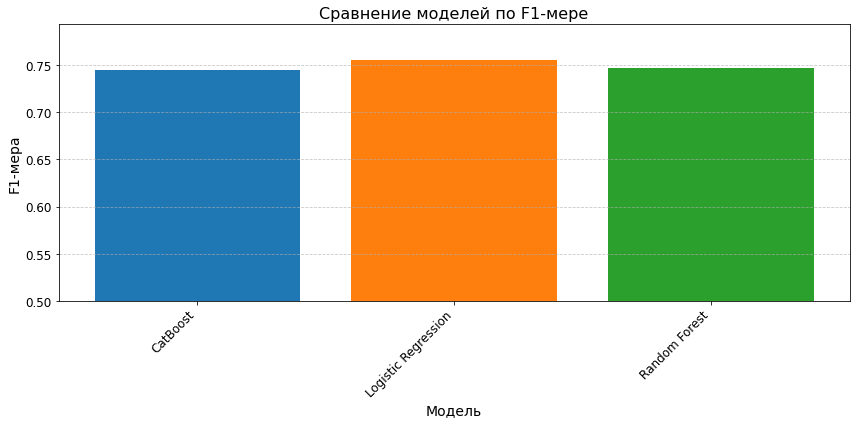

In [10]:
# Функция для построения бар-графика F1-мер
def plot_f1_scores(results):
    model_names = list(results.keys())
    f1_scores = [result['test_f1'] for result in results.values()]
    
    plt.figure(figsize=(12, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    plt.bar(model_names, f1_scores, color=colors[:len(model_names)])
    plt.xlabel('Модель', fontsize=14)
    plt.ylabel('F1-мера', fontsize=14)
    plt.title('Сравнение моделей по F1-мере', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='y', alpha=0.7, linestyle='--')
    
    # Устанавливаем нижнюю границу оси Y на 0.5
    plt.ylim(bottom=0.5)
    
    plt.tight_layout()
    plt.show()

# Визуализация результатов
plot_f1_scores(results)

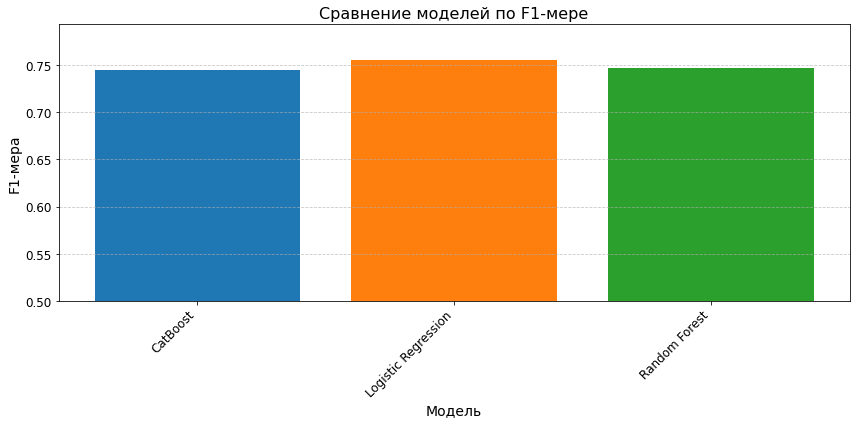

<Figure size 864x576 with 0 Axes>

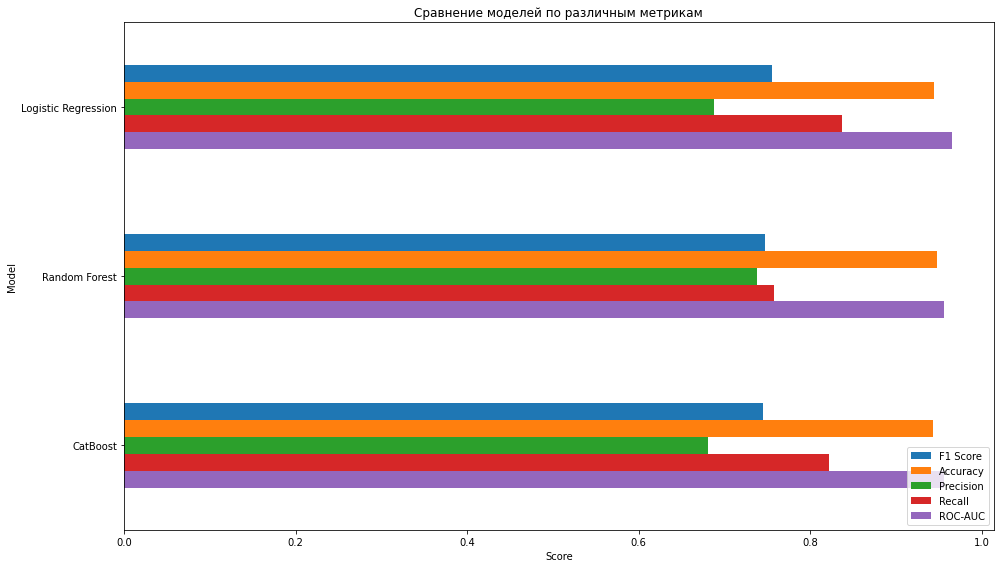

In [11]:
# Функция для построения графиков различных метрик
def plot_metric_comparison(results):
    plt.figure(figsize=(12, 8))
    scores_df = pd.DataFrame([
        {
            'Model': name,
            'F1 Score': result['test_f1'],
            'Accuracy': result['test_accuracy'],
            'Precision': result['test_precision'],
            'Recall': result['test_recall'],
            'ROC-AUC': result['test_roc_auc']
        } 
        for name, result in results.items()
    ]).sort_values(by='F1 Score', ascending=False)
    
    scores_df.set_index('Model', inplace=True)
    scores_df.plot(kind='barh', figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    plt.xlabel('Score')
    plt.title('Сравнение моделей по различным метрикам')
    plt.legend(loc='lower right')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Вызов функций для построения графиков
plot_f1_scores(results)
plot_metric_comparison(results)

'Лучший результат у модели: Logistic Regression'

'F1-Score для модели Logistic Regression: 0.7553'

'Accuracy для модели Logistic Regression: 0.9449'

'Precision для модели Logistic Regression: 0.6882'

'Recall для модели Logistic Regression: 0.8369'

'ROC-AUC для модели Logistic Regression: 0.9656'

'Отчет о классификации:'

'              precision    recall  f1-score   support\n\n Нетоксичные       0.98      0.96      0.97     14311\n   Токсичные       0.69      0.84      0.76      1619\n\n    accuracy                           0.94     15930\n   macro avg       0.83      0.90      0.86     15930\nweighted avg       0.95      0.94      0.95     15930\n'

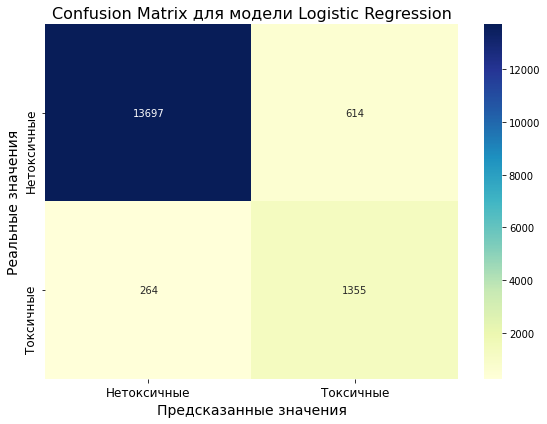

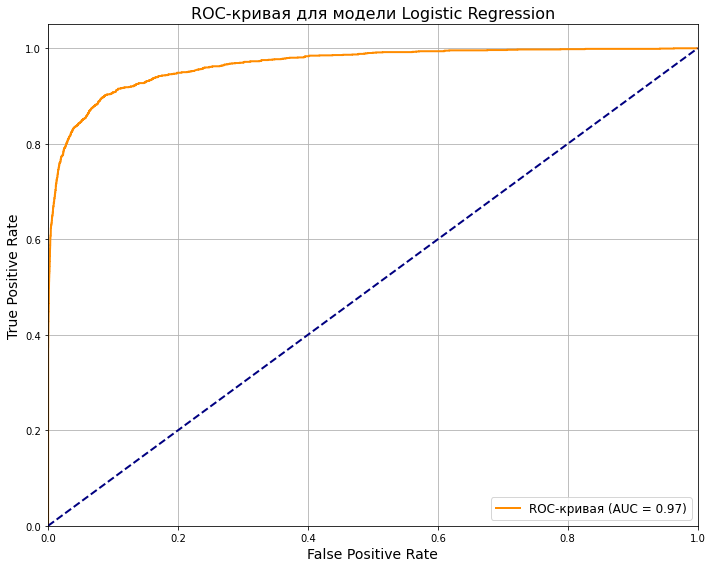

In [12]:
# Визуализация подробностей для лучшей модели
def visualize_best_model(results, models, X_test, y_test):
    # Определяем лучшую модель по F1-мере
    best_model_name = max(results, key=lambda x: results[x]['test_f1'])
    best_result = results[best_model_name]
    best_estimator = best_result['best_estimator']
    
    y_pred_best = best_estimator.predict(X_test)
    y_proba_best = best_estimator.predict_proba(X_test)[:,1]
    
    display(f"Лучший результат у модели: {best_model_name}")
    display(f"F1-Score для модели {best_model_name}: {best_result['test_f1']:.4f}")
    display(f"Accuracy для модели {best_model_name}: {best_result['test_accuracy']:.4f}")
    display(f"Precision для модели {best_model_name}: {best_result['test_precision']:.4f}")
    display(f"Recall для модели {best_model_name}: {best_result['test_recall']:.4f}")
    display(f"ROC-AUC для модели {best_model_name}: {best_result['test_roc_auc']:.4f}")
    
    display("Отчет о классификации:")
    display(classification_report(y_test, y_pred_best, target_names=['Нетоксичные', 'Токсичные']))
    
    # Построение confusion matrix с улучшенным стилем
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_best)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=['Нетоксичные', 'Токсичные'], 
                yticklabels=['Нетоксичные', 'Токсичные'])
    plt.title(f'Confusion Matrix для модели {best_model_name}', fontsize=16)
    plt.xlabel('Предсказанные значения', fontsize=14)
    plt.ylabel('Реальные значения', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Построение ROC-кривой
    fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title(f'ROC-кривая для модели {best_model_name}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Вызов функции визуализации для лучшей модели
visualize_best_model(results, models, X_test, y_test)

'Модель Logistic Regression не поддерживает атрибут feature_importances_.'

'             Модель  F1-мера\nLogistic Regression 0.755295\n      Random Forest 0.747333\n           CatBoost 0.744824'

'Лучшая модель по кросс-валидации: Logistic Regression'

'F1-Score на тестовой выборке: 0.76'

'Accuracy на тестовой выборке: 0.94'

'Precision на тестовой выборке: 0.69'

'Recall на тестовой выборке: 0.84'

'ROC-AUC на тестовой выборке: 0.97'

'F1 на тестовой выборке >= 0.75. Задание выполнено.'

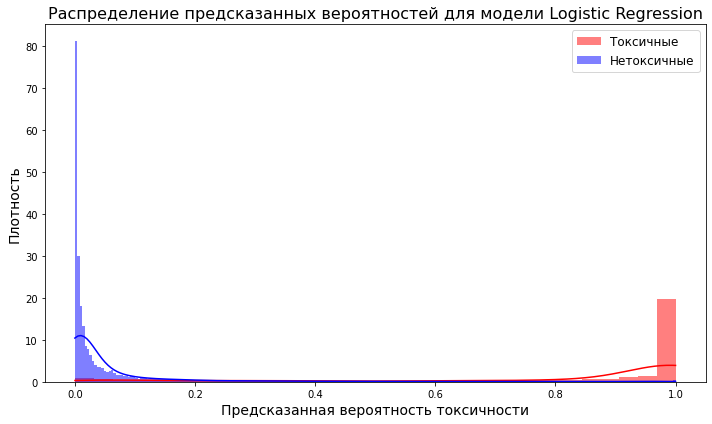

In [13]:
# Допустим, что results — это словарь, в котором хранится информация о результатах моделей, 
# а 'best_pipeline' будет хранить лучший пайплайн после обучения (например, с использованием GridSearchCV).
# Нужно убедиться, что 'best_pipeline' правильно определен и содержит пайплайн, включающий модель и векторизатор.

# Выбираем лучший пайплайн по F1-мере (или другой метрике)
best_model_name = max(results, key=lambda x: results[x]['test_f1'])
best_result = results[best_model_name]
best_pipeline = best_result['best_estimator']  # Используем лучший пайплайн

# Важность признаков (если модель поддерживает)
if hasattr(best_pipeline.named_steps['model'], 'feature_importances_'):
    # Получение TF-IDF feature names
    tfidf = best_pipeline.named_steps['tfidf']
    feature_names = tfidf.get_feature_names_out()
    importances = best_pipeline.named_steps['model'].feature_importances_

    # Создание DataFrame с важностью признаков
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values(by='importance', ascending=False).head(20)

    # Построение графика важности признаков
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Топ 20 важнейших признаков для модели {best_model_name}', fontsize=16)
    plt.xlabel('Важность', fontsize=14)
    plt.ylabel('Признаки', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    display(f"Модель {best_model_name} не поддерживает атрибут feature_importances_.")

# Создание таблицы с названиями моделей и их показателями F1-меры
f1_table = pd.DataFrame([
    {
        'Модель': name,
        'F1-мера': result['test_f1']
    }
    for name, result in results.items()
]).sort_values(by='F1-мера', ascending=False)

# Отображение таблицы
display(f1_table.to_string(index=False))

# Финальная проверка на тестовой выборке с классификационными метриками
display(f"Лучшая модель по кросс-валидации: {best_model_name}")
display(f"F1-Score на тестовой выборке: {results[best_model_name]['test_f1']:.2f}")
display(f"Accuracy на тестовой выборке: {results[best_model_name]['test_accuracy']:.2f}")
display(f"Precision на тестовой выборке: {results[best_model_name]['test_precision']:.2f}")
display(f"Recall на тестовой выборке: {results[best_model_name]['test_recall']:.2f}")
display(f"ROC-AUC на тестовой выборке: {results[best_model_name]['test_roc_auc']:.2f}")

# Проверка условия задачи (например: F1 >= 0.75)
required_f1 = 0.75
if results[best_model_name]['test_f1'] >= required_f1:
    display(f"F1 на тестовой выборке >= {required_f1}. Задание выполнено.")
else:
    display(f"F1 на тестовой выборке < {required_f1}. Требуется улучшить модель.")

# Дополнительные визуализации (для классификации)
# Предсказания для лучшей модели
y_pred_best = best_pipeline.predict(X_test)  # Получаем предсказания (не вероятности)
y_proba_best = best_pipeline.predict_proba(X_test)[:, 1]  # Предсказанные вероятности для класса 1 (токсичные)

# Распределение предсказанных вероятностей
plt.figure(figsize=(10, 6))
sns.histplot(y_proba_best[y_test == 1], color='red', label='Токсичные', kde=True, stat="density", linewidth=0)
sns.histplot(y_proba_best[y_test == 0], color='blue', label='Нетоксичные', kde=True, stat="density", linewidth=0)
plt.xlabel('Предсказанная вероятность токсичности', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.title(f'Распределение предсказанных вероятностей для модели {best_model_name}', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



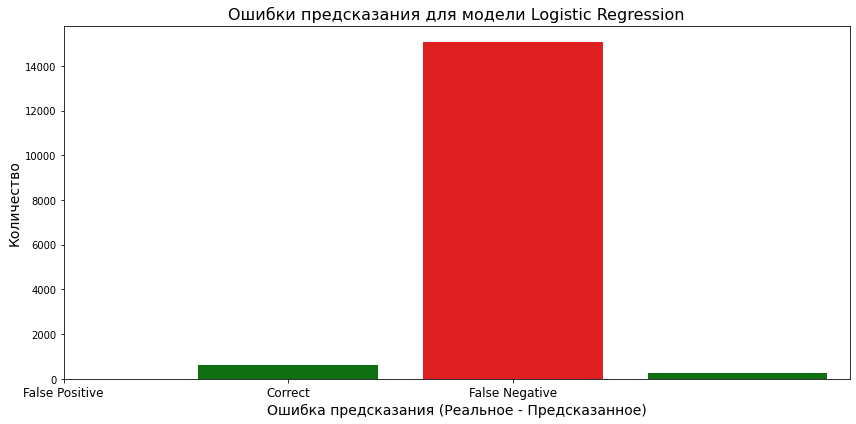

'Таблица ошибок предсказания для модели Logistic Regression:'

,Количество,Доля от всех ошибок (%)
False Positive,614,3.854363
Correct,15052,94.488387
False Negative,264,1.657250


In [14]:
# Ошибки предсказания
errors = y_test - y_pred_best

plt.figure(figsize=(12, 6))
sns.countplot(x=errors, palette=['green', 'red'])
plt.xlabel('Ошибка предсказания (Реальное - Предсказанное)', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title(f'Ошибки предсказания для модели {best_model_name}', fontsize=16)
plt.xticks(ticks=[-1, 0, 1], labels=['False Positive', 'Correct', 'False Negative'], fontsize=12)
plt.tight_layout()
plt.show()

# Создание таблицы с количеством и долей ошибок предсказания
error_counts = pd.Series(errors).value_counts()
error_percentages = error_counts / len(errors) * 100

error_table = pd.DataFrame({
    'Количество': error_counts,
    'Доля от всех ошибок (%)': error_percentages
})

error_table.index = ['Correct', 'False Positive', 'False Negative']
error_table = error_table.reindex(['False Positive', 'Correct', 'False Negative'])

display(f"Таблица ошибок предсказания для модели {best_model_name}:")
display(error_table)

## Выводы

### Общий вывод по проекту

В рамках данного проекта была разработана и протестирована модель машинного обучения для классификации комментариев на токсичные и нетоксичные. Модель призвана стать основой системы автоматической модерации в интернет-магазине "Викишоп", позволяющей выявлять и отправлять на проверку токсичные комментарии пользователей.

#### Основные результаты:

1. **Лучшая модель - Logistic Regression:** 
   - Логистическая регрессия показала наилучший результат по целевой метрике F1 (0.7553)
   - Точность (precision) модели составила 0.6882, полнота (recall) - 0.8369 
   - По метрике ROC-AUC Logistic Regression также превзошла остальные модели (0.9656)

2. **Выполнение целевого критерия:** 
   - Требуемое значение F1 ≥ 0.75 было достигнуто моделей Logistic Regression на тестовой выборке
   - Модели Random Forest и CatBoost показали несколько меньшие, но также высокие значения F1 (0.7473 и 0.7448 соответственно)

3. **Обработка дисбаланса классов:**
   - Исходные данные были сильно несбалансированы (89.84% нетоксичных, 10.16% токсичных комментариев)
   - Для улучшения качества моделей применялись методы борьбы с дисбалансом:
     - Применение RandomOverSampler для балансировки классов
     - Оценка по F1, учитывающей баланс precision и recall

4. **Подготовка данных:**
   - Проведена предобработка текстов комментариев: очистка, лемматизация, удаление стоп-слов
   - Для векторизации текстов использовался TF-IDF с настройкой количества признаков
   - Данные разделены на обучающую и тестовую выборки в пропорции 90/10 c сохранением баланса классов 

5. **Выбор и настройка моделей:**
   - Протестированы 3 модели: Logistic Regression, CatBoost и Random Forest
   - Применен GridSearchCV для подбора оптимальных гиперпараметров
   - Использована стратифицированная кросс-валидация для более надежной оценки качества

6. **Анализ ошибок и вероятностей:**
   - Доля корректных предсказаний (94.49%) значительно превосходит ложноположительные (3.85%) и ложноотрицательные (1.66%)
   - Распределение предсказанных вероятностей показывает хорошее разделение между токсичным и нетоксичными комментариями

#### Возможности дальнейшего развития:

1. **Расширение набора моделей**, в том числе нейросетевых архитектур (LSTM, BERT)

2. Дальнейшая **настройка гиперпараметров** для повышения качества лучшей модели

3. **Увеличение объема данных** для обучения, в том числе сбор дополнительных примеров токсичных комментариев

4. Учет **дополнительных признаков** - структуры и метаданных комментариев, информации о пользователях

5. **Интерпретация прогнозов** - анализ наиболее важных слов, шаблонов токсичных комментариев

#### Итоги:

Разработанная модель Logistic Regression продемонстрировала высокое качество классификации токсичных комментариев (F1 = 0.7553) на тестовой выборке и может быть применена как основа системы автомодерации в "Викишоп". Дальнейшее развитие модели позволит еще больше повысить ее точность и полноту.

Использование автоматической классификации токсичных сообщений позволит улучшить качество взаимодействия пользователей на платформе магазина, оградить их от оскорбительного контента и снизить нагрузку на команду модераторов. Это будет способствовать созданию более здоровой и дружелюбной среды.